<>:98: SyntaxWarning: invalid escape sequence '\l'
<>:98: SyntaxWarning: invalid escape sequence '\l'
C:\Users\aroyy\AppData\Local\Temp\ipykernel_17512\1530570201.py:98: SyntaxWarning: invalid escape sequence '\l'
  ax_msd.set_ylabel('MSD ($\langle r^2(t) \\rangle$)')


Memulai simulasi Gerak Brownian...
Simulasi selesai.
Menghitung Mean Square Displacement (MSD)...
MSD selesai dihitung.


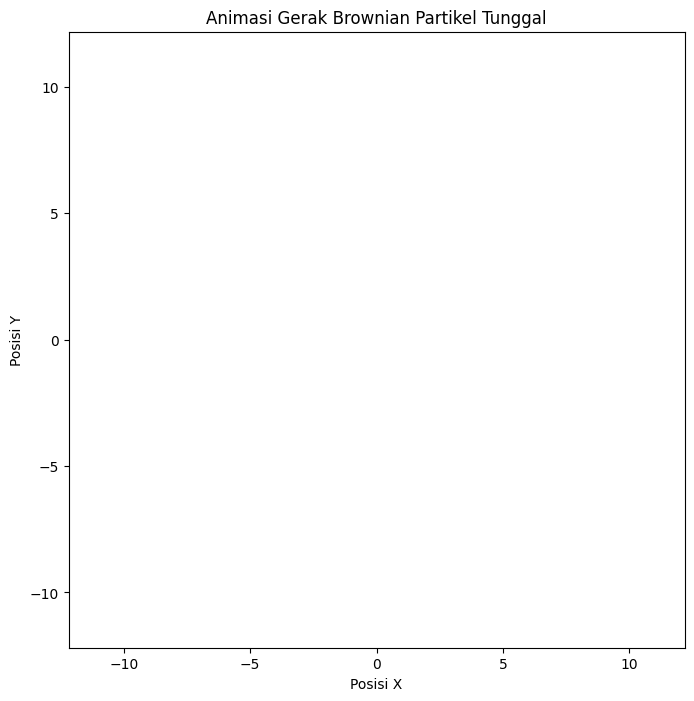

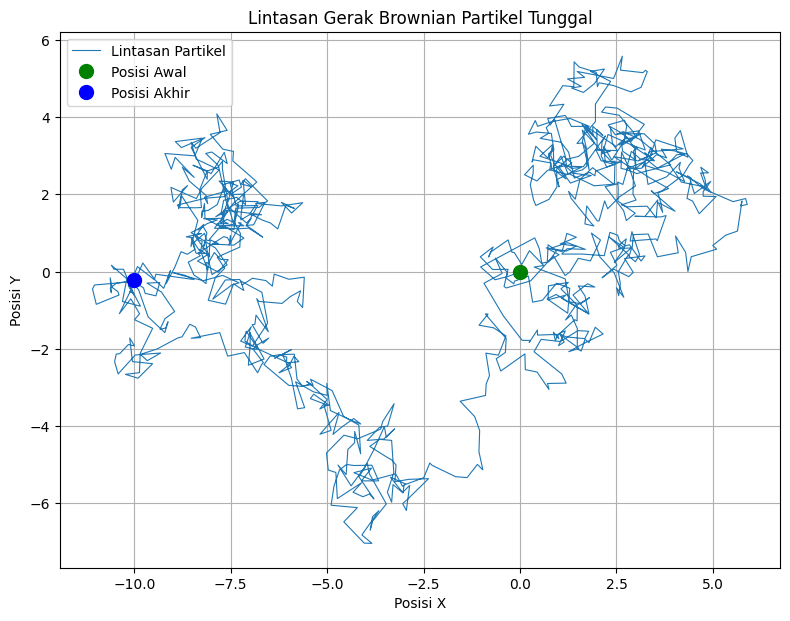

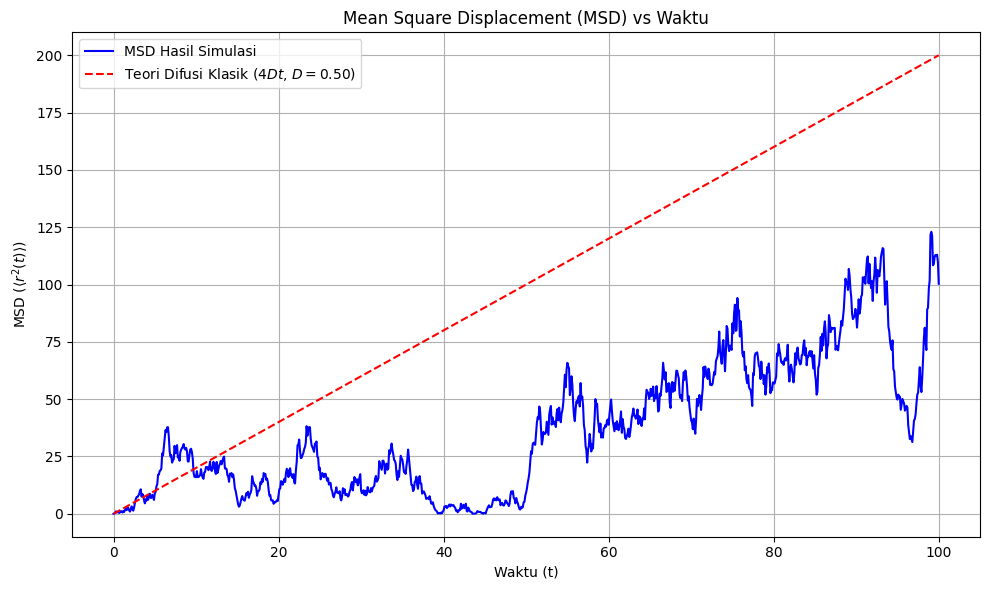


--- Penjelasan Kode ---
1. Inisialisasi parameter simulasi seperti jumlah langkah, delta t, dan sigma.
2. Posisi partikel diinisialisasi pada (0,0).
3. Loop utama simulasi menghitung perubahan posisi (dx, dy) dari distribusi normal.
   'np.random.normal(0, np.sqrt(sigma**2 * dt), num_particles)' digunakan untuk menghasilkan
   perubahan acak yang sesuai dengan teori difusi, di mana variansi langkah sebanding dengan dt.
4. Posisi partikel diperbarui di setiap langkah.
5. Mean Square Displacement (MSD) dihitung sebagai rata-rata kuadrat perpindahan dari posisi awal.
6. Matplotlib digunakan untuk memvisualisasikan lintasan partikel dan grafik MSD vs waktu.
7. Garis teori difusi klasik ($4Dt$) ditambahkan ke grafik MSD untuk perbandingan.
   Koefisien difusi D dihitung berdasarkan parameter sigma yang digunakan.
   (Perhatikan: MSD = 2dDt, dimana d adalah dimensi. Untuk 2D, MSD = 4Dt)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# --- Parameter Simulasi ---
num_steps = 1000  # Jumlah langkah simulasi
dt = 0.1          # Ukuran langkah waktu (delta t)
sigma = 1.0       # Parameter variansi untuk distribusi normal (terkait dengan D)
num_particles = 1 # Jumlah partikel yang disimulasikan (untuk contoh ini, satu partikel)

# --- Inisialisasi Posisi Awal ---
# Menggunakan array NumPy untuk menyimpan posisi x dan y dari setiap partikel
x_positions = np.zeros((num_particles, num_steps + 1))
y_positions = np.zeros((num_particles, num_steps + 1))

# --- Simulasi Gerak Brownian ---
print("Memulai simulasi Gerak Brownian...")
for step in range(num_steps):
    # Generasi perubahan posisi acak (dx, dy) untuk setiap partikel
    # Menggunakan distribusi normal N(0, sigma^2 * dt)
    # Faktor dt diperlukan untuk konsistensi dimensi dengan koefisien difusi
    dx = np.random.normal(0, np.sqrt(sigma**2 * dt), num_particles)
    dy = np.random.normal(0, np.sqrt(sigma**2 * dt), num_particles)

    # Perbarui posisi partikel
    x_positions[:, step + 1] = x_positions[:, step] + dx
    y_positions[:, step + 1] = y_positions[:, step] + dy
print("Simulasi selesai.")

# --- Perhitungan Mean Square Displacement (MSD) ---
print("Menghitung Mean Square Displacement (MSD)...")
# Menghitung perpindahan kuadrat dari posisi awal (0,0) untuk setiap partikel
squared_displacements = (x_positions - x_positions[:, 0][:, np.newaxis])**2 + \
                        (y_positions - y_positions[:, 0][:, np.newaxis])**2

# Menghitung rata-rata MSD jika ada banyak partikel, atau hanya mengambil MSD partikel tunggal
msd = np.mean(squared_displacements, axis=0) # Rata-rata MSD lintas partikel pada setiap waktu

# Array waktu
time = np.arange(0, (num_steps + 1) * dt, dt)
print("MSD selesai dihitung.")

# --- Visualisasi ---

# 1. Animasi Lintasan Partikel (opsional, bisa memakan waktu rendering)
fig_anim, ax_anim = plt.subplots(figsize=(8, 8))
ax_anim.set_title('Animasi Gerak Brownian Partikel Tunggal')
ax_anim.set_xlabel('Posisi X')
ax_anim.set_ylabel('Posisi Y')
ax_anim.set_aspect('equal', adjustable='box') # Agar skala X dan Y sama

# Batas plot, bisa disesuaikan
max_range = np.max(np.abs([x_positions, y_positions])) * 1.1
ax_anim.set_xlim([-max_range, max_range])
ax_anim.set_ylim([-max_range, max_range])

line, = ax_anim.plot([], [], 'o-', lw=0.5) # 'o-' untuk titik dan garis, lw=0.5 untuk ketebalan garis
point, = ax_anim.plot([], [], 'ro', markersize=8) # Titik merah untuk posisi saat ini

def init_anim():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def animate(i):
    # Untuk partikel pertama (indeks 0)
    line.set_data(x_positions[0, :i], y_positions[0, :i])
    point.set_data(x_positions[0, i], y_positions[0, i])
    return line, point

# Membuat animasi. frames=num_steps+1 berarti setiap langkah simulasi akan menjadi frame
# interval=10 berarti setiap frame akan muncul setiap 10 ms
# blit=True agar animasi lebih cepat (hanya menggambar elemen yang berubah)
# Anda bisa menyimpan animasi sebagai gif atau mp4 jika diperlukan
# anim = animation.FuncAnimation(fig_anim, animate, init_anim, frames=num_steps + 1, interval=10, blit=True)
# plt.show() # Tampilkan animasi, jika tidak ingin menampilkan bersamaan dengan plot lainnya, komentar baris ini

# Karena animasi dapat memperlambat proses atau membutuhkan environment khusus,
# kita akan menampilkan plot lintasan statis sebagai alternatif.
fig_path, ax_path = plt.subplots(figsize=(8, 8))
ax_path.plot(x_positions[0, :], y_positions[0, :], lw=0.8, label='Lintasan Partikel')
ax_path.plot(x_positions[0, 0], y_positions[0, 0], 'go', markersize=10, label='Posisi Awal') # Titik awal hijau
ax_path.plot(x_positions[0, -1], y_positions[0, -1], 'bo', markersize=10, label='Posisi Akhir') # Titik akhir biru
ax_path.set_title('Lintasan Gerak Brownian Partikel Tunggal')
ax_path.set_xlabel('Posisi X')
ax_path.set_ylabel('Posisi Y')
ax_path.set_aspect('equal', adjustable='box')
ax_path.legend()
ax_path.grid(True)
plt.tight_layout()
# plt.show() # Tampilkan lintasan statis

# 2. Grafik Mean Square Displacement (MSD) vs Waktu
fig_msd, ax_msd = plt.subplots(figsize=(10, 6))
ax_msd.plot(time, msd, 'b-', label='MSD Hasil Simulasi')
ax_msd.set_title('Mean Square Displacement (MSD) vs Waktu')
ax_msd.set_xlabel('Waktu (t)')
ax_msd.set_ylabel('MSD ($\langle r^2(t) \\rangle$)')
ax_msd.grid(True)

# Tambahkan garis teori difusi klasik: <r^2(t)> = 2dDt (d=dimensi)
# Untuk 2 dimensi, MSD = 4Dt
# Kita bisa mengestimasi koefisien difusi D dari sigma: D = sigma^2 / 2 (untuk dx/dy dari N(0, sigma^2))
# Jadi, D_simulasi = (sigma**2 / (2 * dt)) * dt = sigma**2 / 2
# Karena kita menggunakan np.sqrt(sigma**2 * dt) untuk dx/dy, maka variansi dari dx/dy adalah sigma^2 * dt.
# MSD = 4 * D * t. Jika dx ~ N(0, Var), maka Var = 2Dt.
# Untuk 2D, Variansi = sigma^2 * dt. Jadi 2D_eff * dt = sigma^2 * dt. D_eff = sigma^2 / 2.
# Maka, MSD_teori = 4 * (sigma**2 / 2) * time = 2 * sigma**2 * time
D_teoritis = sigma**2 / 2
msd_theory = 4 * D_teoritis * time
ax_msd.plot(time, msd_theory, 'r--', label=f'Teori Difusi Klasik ($4Dt$, $D={D_teoritis:.2f}$)')

ax_msd.legend()
plt.tight_layout()

# Tampilkan semua plot
plt.show()

print("\n--- Penjelasan Kode ---")
print("1. Inisialisasi parameter simulasi seperti jumlah langkah, delta t, dan sigma.")
print("2. Posisi partikel diinisialisasi pada (0,0).")
print("3. Loop utama simulasi menghitung perubahan posisi (dx, dy) dari distribusi normal.")
print("   'np.random.normal(0, np.sqrt(sigma**2 * dt), num_particles)' digunakan untuk menghasilkan")
print("   perubahan acak yang sesuai dengan teori difusi, di mana variansi langkah sebanding dengan dt.")
print("4. Posisi partikel diperbarui di setiap langkah.")
print("5. Mean Square Displacement (MSD) dihitung sebagai rata-rata kuadrat perpindahan dari posisi awal.")
print("6. Matplotlib digunakan untuk memvisualisasikan lintasan partikel dan grafik MSD vs waktu.")
print("7. Garis teori difusi klasik ($4Dt$) ditambahkan ke grafik MSD untuk perbandingan.")
print("   Koefisien difusi D dihitung berdasarkan parameter sigma yang digunakan.")
print("   (Perhatikan: MSD = 2dDt, dimana d adalah dimensi. Untuk 2D, MSD = 4Dt)")
